In [1]:
from faker import Faker
import numpy.random as npr
from dataclasses import dataclass
import numpy as np
from datetime import datetime
from time import sleep
from matplotlib import pyplot as plt
from collections import defaultdict
from time import time

# Лабораторная работа №3

## Вариант 12.

In [2]:
sizes = (100, 500, 1000, 5000, 10000, 30000, 100000)
clubsList = ("Россия Спартак-Владикавказ Владикавказ ",
"Россия Рубин Казань ",
"Россия Сочи Сочи ",
"Россия Енисей Красноярск ",
"Россия Звезда Пермь ",
"Россия Балтика Калининград ",
"Россия СКА-Хабаровск Хабаровск ",
"Россия Салют Белгород ",
"Россия Динамо Брянск ",
"Россия Торпедо Владимир ",
"Россия Ротор-Волгоград Волгоград ",
"Россия Факел Воронеж ",
"Россия Металлург Липецк ",
"Россия Химки Химки ",
"Россия Сибирь Новосибирск ",
"Россия Авангард Курск ",
"Россия Ростов Ростов ",
"Россия Крылья-советов Самара ",
"Россия Сокол Саратов ",
"Россия Урал Екатеренбург ",
"Россия Днепр Смоленск ",
"Россия Шинник Ярославль ",
"Россия Динамо  Москва ",
"Россия Зенит Санкт-Петербург ",
"Россия ЦСКА Москва ",
"Россия Спартак Москва ",
"Россия Локомотив Москва ",
"Украина Шахтер Донецк ",
"Украина Динамо Киев ",
"Украина Заря Луганск ",
"Украина Десна Чернигов ",
"Украина Кривбасс Кривой-Рог ",
"Украина Днепр Днепропетровск ",
"Украина Верес Львов ",
"Украина Звезда Кировоград ",
"Украина Черноморец Одесса ",
"Украина Оболонь Киев ",
"Украина Металлист Харьков ",
"Украина Нефтяник-Укрнефть Ахтырка ",
"Украина Сталь Алчевск ",
"Украина Арсенал Киев ",
"Украина Олимпик Донецк ",
"Украина Металлург Донецк ",
"Украина Львов Львов ",
"Украина Металлург Запорожье ",
"Украина Карпаты Львов ",
"Украина Волынь Луцк ",
"Украина Ворскла Полтава ",
"Украина Харьков Харьков ",
"Украина Говерла-Закарпатье Ужгород ")

### 1. Создание класса и перегрузка его операторов

In [3]:
@dataclass
class Club:
    """
    Датакласс, отвечающий за инициализацию объектов типа Club.
    Инициализация происходит посредством передачи в конструктор класса параметров ниже.
    """        
    clubCountry: str
    clubName: str
    clubCity: str
    clubYear: str
    coachName: str
    clubResult: str
    
    # Перегрузка оператора '>'
    def __gt__(self, other):
       
        if self.clubName > other.clubName:
            return True
        elif self.clubName == other.clubName:
            if int(self.clubResult) > int(other.clubResult):
                return True
            elif int(self.clubResult) == int(other.clubResult):
                if self.coachName > other.coachName:
                    return True
        return False
    
    # Перегрузка оператора '>='
    def __ge__(self, other):
        if self.clubName >= other.clubName:
            return True
        elif self.clubName == other.clubName:
            if int(self.clubResult) >= int(other.clubResult):
                return True
            elif int(self.clubResult) == int(other.clubResult):
                if self.coachName >= other.coachName:
                    return True
        return False 
    
    # Перегрузка оператора '<'
    def __lt__(self, other):
        if self.clubName < other.clubName:
            return True
        elif self.clubName == other.clubName:
            if int(self.clubResult) < int(other.clubResult):
                return True
            elif int(self.clubResult) == int(other.clubResult):
                if self.coachName < other.coachName:
                    return True
        return False
    
    # Перегрузка оператора '<='
    def __le__(self, other):
        if self.clubName <= other.clubName:
            return True
        elif self.clubName == other.clubName:
            if int(self.clubResult) <= int(other.clubResult):
                return True
            elif int(self.clubResult) == int(other.clubResult):
                if self.coachName <= other.coachName:
                    return True
        return False
     
    # Создание метода для перевода класса в тип String    
    def toStr(self):
        return ' '.join(self.__dict__.values())   


### 2. Создание масивов данных

In [4]:
clubs = {}
for i, size in enumerate(sizes):
    with open(f'data/data{size}.txt') as arr:
        clubs[i] = np.empty(size, dtype=Club)
        for j, string in enumerate(arr.read()[:-1].split('\n')):
            data = string.split()
            clubs[i][j] = Club(
                clubCountry = data[0],
                clubName = data[1],
                clubCity = data[2],
                clubYear = data[3],
                coachName = ' '.join(data[4:7]),
                clubResult = data[7]
            )

### 3. Линейный поиск

In [5]:
def linearSearch(data, x):                         
    """Прямой(линейный) поиск
    linearSearch(array, x) -> index
    data - массив
    x - искомый элемент
    
    """
    array = []
    for element in data:         
        if element.clubName == x:                           
            array.append(element)
    return array                                     

### 4. Бинарный поиск

In [6]:
def binarySearch(data, x):                         
    """Бинарный поиск
    binarySearch(data, x) -> index
    data - массив
    x - искомый элемент

    """
    array = []
    # Устанавливаем границы и середину поиска
    left = 0                                        
    right = len(data) - 1                          
    middle = right // 2 
    # Меняем границы нашего поиска до тех пор, пока искомый элемент не будет находится
    # в середине нашего поиска
    while data[middle].clubName != x and left < right:  
        if x > data[middle].clubName:                       
            left = middle + 1                        
        else:                                       
            right = middle - 1                      
        middle = (left+right) // 2 
    # Как только нашли искомый элемент, проверяем соседние элементы
    if data[middle].clubName == x:
        array.append(data[middle])
        left = middle - 1
        while data[left].clubName == x:
            array.append(data[left])
            left -= 1
            # Проверка на левую границу массива
            if left < 0:
                break
        right = middle + 1
        while data[right].clubName == x:
            array.append(data[right])
            right += 1
            # Проверка на правую границу массива
            if right > len(data) - 1:
                break
    return array     

### 5. Multimap

In [7]:
def multimapCreation(array):
    """Функция для создания multimap
    multimapCreation(array) -> dict
    array - массив данных
    multimap - словарь ключ: [значения]    
    """
    keys = map(lambda x: x.clubName, array)
    keys_array = zip(keys, array) 
    multimap = defaultdict(list)
    for k, v in keys_array:
        multimap[k].append(v)    
    return multimap        

# ключ1: [элемент1, элемент 2]

### 6. Простая и сложна функция получения хэша строки

In [8]:
def simpleHash(data, p = 61):
    """Простая функция получения хэша строки """
    hashValue = ord(data[0])
    p_pow = 1
    for i in range(1, len(data)):
        hashValue += (ord(data[i]))*p_pow
        p_pow = p_pow*p
    return hashValue

def lyHash(data):
    """ly функция получения хэша строки"""
    hashValue = 0
    for i in range(0,len(data)):
        hashValue = (hashValue * 1664525) + ord(data[i]) * 1013904223
    return hashValue


### 7. Коллизии: метод двойного хэширования

In [9]:
def hashCollision(data, p = 53):
    """Функция получения хэша строки для doubleHashing"""
    hashValue = ord(data[0])
    p_pow = 1
    for i in range(1, len(data)):
        hashValue += (ord(data[i]))*p_pow
        p_pow = p_pow*p
    return hashValue

def doubleHashing(data, alg, i):
    """Функция для двойного хэширования"""
    
    if alg == 'simple':
        mod = 2**200
        x = simpleHash(data)
        y = hashCollision(data)
        hashValue = (x+y*i)%mod
        
    if alg == 'ly':
        mod = 2**500
        x = lyHash(data)
        y = hashCollision(data)
        hashValue = (x+y*i)%mod
    
    return hashValue

### 8. Описание класса для поиска с помощью "простой" хэш-функции

In [10]:
class SimpleHash:
    """Класс для поиска по хэшу с простой функцией
        array (defaultdict)- хэш 
        numberOfCollisions (int)- количество коллизий
    """
    
    def __init__(self):
        self.array = defaultdict(list)
        self.numberOfCollisions = 0
           
    def add(self, object):
        """Добавление элемента в хэш-таблицу с простым алгоритмом хэширования"""
        hashValue = simpleHash(object.clubName)
        i = 1
        while (hashValue in self.array) and (object.clubName != self.get_hash(hashValue)[0].clubName):
            self.numberOfCollisions+=1
            hashValue = doubleHashing(object.clubName, 'simple', i)
            i += 1                        
        self.array[hashValue].append(object)
        
    def get_hash(self, hashValue):
        """Поиск элемента по хэшу"""
        if self.array[hashValue] is None:
            print("Элемент не найдет")
            return [0]
        else: 
            return self.array[hashValue]

    def get_key(self, key):
        """Поиск элемента по строке ключа"""
        hashValue = simpleHash(key)
        i = 1
        if len(self.array[hashValue]) > 0:
            while key != self.get_hash(hashValue)[0].clubName:
                hashValue = doubleHashing(object.clubName, 'simple', i)
                i += 1    
        return self.array[hashValue]

### 8. Описание класса для поиска с помощью "сложной" хэш-функции

In [11]:
class LyHash:
    """Класс для поиска по хэшу с сложной функцией
        array (defaultdict)- хэш 
        numberOfCollisions (int)- количество коллизий
    """
    
    def __init__(self):
        self.array = defaultdict(list)
        self.numberOfCollisions = 0

    def add(self, object):
        """Добавление элемента в хэш-таблицу с ly алгоритмом хэширования"""
        hashValue = lyHash(object.clubName)
        i = 1
        while (hashValue in self.array) and (object.clubName != self.get_hash(hashValue)[0].clubName):
            self.numberOfCollisions += 1
            hashValue = doubleHashing(object.clubName, 'ly', i)
            i+=1                        
        self.array[hashValue].append(object)

    def get_hash(self, hashValue):
        """Поиск элемента по хэшу"""
        if self.array[hashValue] is None:
            print("Элемент не найдет")
            return [0]
        else: 
            return self.array[hashValue]

    def get_key(self, key):
        """Поиск элемента по строке ключа"""
        hashValue = lyHash(key)
        i = 1
        if len(self.array[hashValue]) != 0:
            while key != self.get_hash(hashValue)[0].clubName:
                hashValue = doubleHashing(object.clubName, 'ly', i)
                i+=1    
        return self.array[hashValue]

### 10. Реализация поисков 

In [12]:
linearTiming = []
binaryTiming = []
sortBinaryTiming = []
keyTiming = []
keysList = []
simpleHashTiming = []
lyHashTiming = []
simpleCollisions = []
lyCollisions = []

for club in clubsList:
    keysList.append(club.split(' ')[1])

for i, size in enumerate(sizes):
    clubsCopy = clubs[i].copy()
    randomKey = npr.choice(keysList)
    #randomKey = clubs[i][npr.randint(0, size)].coachName.split(' ')[0]
    print(f'\nРазмер: {size}\tЗапись: {randomKey}') 
    
    # Прямой и Бинарный поиск
    linearTime, binaryTime = 0, 0
    for _ in range(500):   
        check = time()
        linearArray = linearSearch(clubsCopy, randomKey)
        linearTime += time() - check

        check = time()
        binaryArray = binarySearch(clubsCopy, randomKey)
        binaryTime += time() - check
    
    linearTime /= 500
    binaryTime /= 500
    linearTiming.append(linearTime)
    binaryTiming.append(binaryTime)
    with open(f'linear/linear{size}.txt', 'w') as file:
        file.write('\n'.join(map(' '.join, map(lambda e: e.__dict__.values(), linearArray))))
    print(f'Прямой поиск.\t\t\t{len(linearArray)}')    
    with open(f'binary/binary{size}.txt', 'w') as file:
        file.write('\n'.join(map(' '.join, map(lambda e: e.__dict__.values(), binaryArray))))
    print(f'Бинарный поиск.\t\t\t{len(binaryArray)}')
    
    
    # Поис по ключу
    keyTime = 0
    multimap = multimapCreation(clubsCopy)
    for _ in range(10000):
        check = time()
        multimap[randomKey]
        keyTime += time() - check
    keyTime /= 10000
    keyTiming.append(keyTime)
    with open(f'multimap/multimap{size}.txt', 'w') as file:
        file.write('\n'.join(map(' '.join, map(lambda e: e.__dict__.values(), multimap[randomKey]))))  
    print(f'Поиск по ключу.\t\t\t{len(multimap[randomKey])}') 
        
        
    # Простая хэш-функция  
    simpleHashTime = 0
    simple = SimpleHash()
    for element in clubsCopy:
        simple.add(element)    
    for _ in range(100000):        
        check = time()
        simpleHashArray = simple.get_key(randomKey)
        simpleHashTime += time() - check        
    simpleHashTime /= 100000       
    with open(f'simpleHash/simpleHash{size}.txt', 'w') as file:
        file.write('\n'.join(map(' '.join, map(lambda e: e.__dict__.values(), simpleHashArray))))
    print(f'Простой хэш.\t\t\t{len(simpleHashArray)}') 

    simpleCollisions.append(simple.numberOfCollisions)
    simpleHashTiming.append(simpleHashTime)
    
    # Сложная хэш-функция
    lyHashTime = 0
    ly = LyHash()
    for element in clubsCopy:
        ly.add(element)    
    for _ in range(100000):        
        check = time()
        lyHashArray = ly.get_key(randomKey)
        lyHashTime += time() - check      
    lyHashTime /= 100000    
    with open(f'lyHash/lyHash{size}.txt', 'w') as file:
        file.write('\n'.join(map(' '.join, map(lambda e: e.__dict__.values(), lyHashArray))))
    print(f'Сложный хэш.\t\t\t{len(lyHashArray)}') 

    lyCollisions.append(ly.numberOfCollisions)
    lyHashTiming.append(lyHashTime)
    
     
   


Размер: 100	Запись: Балтика
Прямой поиск.			1
Бинарный поиск.			1
Поиск по ключу.			1
Простой хэш.			1
Сложный хэш.			1

Размер: 500	Запись: Сокол
Прямой поиск.			9
Бинарный поиск.			9
Поиск по ключу.			9
Простой хэш.			9
Сложный хэш.			9

Размер: 1000	Запись: Спартак
Прямой поиск.			23
Бинарный поиск.			23
Поиск по ключу.			23
Простой хэш.			23
Сложный хэш.			23

Размер: 5000	Запись: Звезда
Прямой поиск.			214
Бинарный поиск.			214
Поиск по ключу.			214
Простой хэш.			214
Сложный хэш.			214

Размер: 10000	Запись: Металлист
Прямой поиск.			208
Бинарный поиск.			208
Поиск по ключу.			208
Простой хэш.			208
Сложный хэш.			208

Размер: 30000	Запись: Верес
Прямой поиск.			604
Бинарный поиск.			604
Поиск по ключу.			604
Простой хэш.			604
Сложный хэш.			604

Размер: 100000	Запись: Днепр
Прямой поиск.			3929
Бинарный поиск.			3929
Поиск по ключу.			3929
Простой хэш.			3929
Сложный хэш.			3929


### 11. Построение графиков

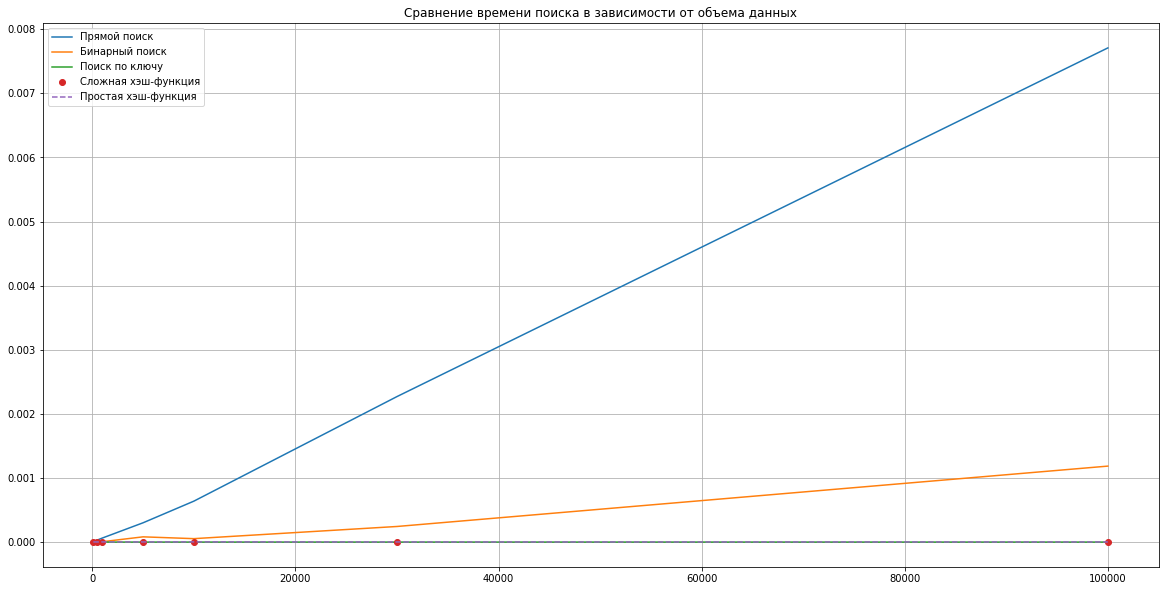

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(sizes, linearTiming, label='Прямой поиск')
ax.plot(sizes, binaryTiming, label='Бинарный поиск')
ax.plot(sizes, keyTiming, label='Поиск по ключу')
ax.plot(sizes, lyHashTiming, 'o', label='Сложная хэш-функция')
ax.plot(sizes, simpleHashTiming, '--', label='Простая хэш-функция')
ax.grid()
ax.legend()
ax.set_title('Сравнение времени поиска в зависимости от объема данных');

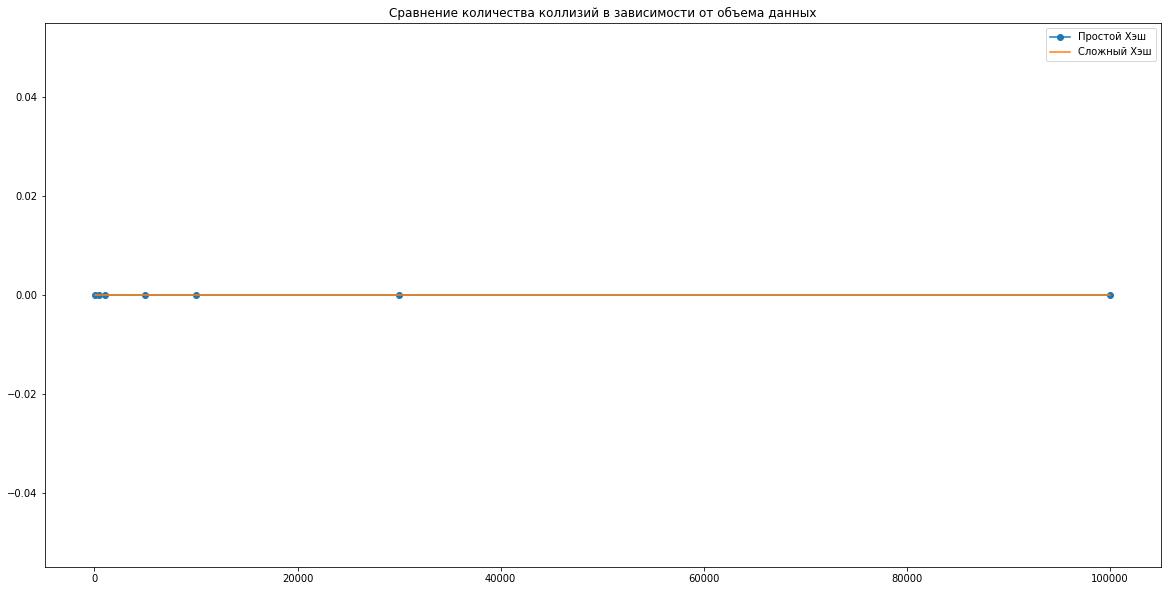

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(sizes, simpleCollisions,'-o', label = 'Простой Хэш')
ax.plot(sizes, lyCollisions, label = 'Сложный Хэш')
ax.legend()
ax.set_title('Сравнение количества коллизий в зависимости от объема данных');